<a href="https://colab.research.google.com/github/satyamagni/AI-enabled-guitar-learning-app/blob/dev/OMRmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and mounting google drive

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import cv2

from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')
!mkdir data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Unzipping the data and saving in a separate folder called 'data'

In [ ]:
!tar -xvf "drive/MyDrive/PrIMuS/primus.tar" -C "data/"   

#Exploring one data instance, each data instance contains 5 files

* Semantic representation of music symbols
* Agnostic representation of music symbols
* PNG image file 
* Musical symbolic representation in MEI (Music Encoding Initiative) format
* Plaine and Easie file encoding (traditional music encoding)
* midi file which is the playable audio format 

1. printing semantic encoding
clef-G2
keySignature-EbM
timeSignature-3/4
note-Bb5_quarter
note-Eb5_eighth
note-Bb5_eighth
note-C6_eighth
note-Bb5_eighth
barline
note-Ab5_eighth
note-Ab5_eighth
rest-sixteenth
note-Ab5_sixteenth
note-G5_sixteenth
note-Ab5_sixteenth
note-Bb5_sixteenth
note-Ab5_sixteenth
note-G5_sixteenth
note-Ab5_sixteenth
barline

2. printing agnostic encoding
clef.G-L2
accidental.flat-L3
accidental.flat-S4
accidental.flat-S2
digit.3-L4
digit.4-L2
note.quarter-S6
note.beamedRight1-S4
note.beamedBoth1-S6
note.beamedBoth1-L7
note.beamedLeft1-S6
barline-L1
note.beamedRight1-L6
note.beamedLeft1-L6
rest.sixteenth-L3
note.beamedRight2-L6
note.beamedBoth2-S5
note.beamedLeft2-L6
note.beamedRight2-S6
note.beamedBoth2-L6
note.beamedBoth2-S5
note.beamedLeft2-L6
barline-L1


3. Music image


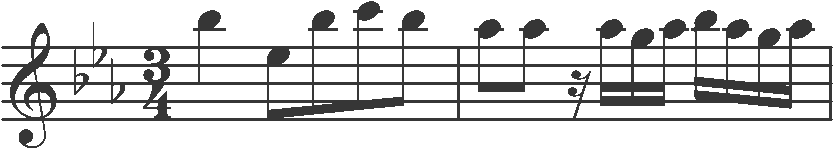

4. printing MEI encoding
<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://music-encoding.org/schema/4.0.0/mei-all.rng" type="application/xml" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://music-encoding.org/schema/4.0.0/mei-all.rng" type="application/xml" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<mei xmlns="http://www.music-encoding.org/ns/mei" meiversion="4.0.0">
    <meiHead>
        <fileDesc>
            <titleStmt>
                <title />
            </titleStmt>
            <pubStmt>
                <date>2017-08-29 23:53:16</date>
            </pubStmt>
        </fileDesc>
        <encodingDesc>
            <projectDesc>
                <p>Encoded with Verovio version 2.0.0-dev-cba6710</p>
            </projectDesc>
        </encodingDesc>
    </meiHead>
    <music>
        <body>
            <mdiv>
                <score>
                    <scoreDef xml:id="scoredef-0000000430709135" key.sig="3f" meter.count="3" me

In [3]:
with open('data/package_aa/000051650-1_1_1/000051650-1_1_1.semantic') as f:
  list = f.read().split('\t')
  print('1. printing semantic encoding')
  for i in range(len(list)):
    print(list[i])

with open('data/package_aa/000051650-1_1_1/000051650-1_1_1.agnostic') as f:
  list = f.read().split('\t')
  print('2. printing agnostic encoding')
  for i in range(len(list)):
    print(list[i])

# Read RGB image
print('\n3. Music image')
img = cv2.imread('data/package_aa/000051650-1_1_1/000051650-1_1_1.png') 
cv2_imshow(img)

with open('data/package_aa/000051650-1_1_1/000051650-1_1_1.mei') as f:
  list = f.read().split('\t')
  print('4. printing MEI encoding')
  for i in range(len(list)):
    print(list[i])

with open('data/package_aa/000051650-1_1_1/regular_pae.pae') as f:
  list = f.read().split('\t')
  print("5. printing 'Plaine and Easie' encoding")
  for i in range(len(list)):
    print(list[i])

#Defining a model framework

In [5]:
from tensorflow import keras
from tensorflow.keras import Input, layers, Model
from tensorflow.keras.layers import Reshape, Dense, Conv2D, LSTM,GlobalMaxPool2D, MaxPool2D, Normalization, Dropout, Flatten

In [18]:
#not the final model code, final model code will look much better 

input_shape = (32,100,500,3)
inputlayer = Input(shape=(10,10,3, ))
convlayer1 = Conv2D(100,3,activation='relu')
maxpoollayer1 = MaxPool2D(pool_size=(2,2),padding='valid')
normlayer1 = Normalization()
dropout1 = Dropout(0.2)
convlayer2 = Conv2D(50,5,activation='relu')
maxpoollayer2 = MaxPool2D(pool_size=(45,1),padding='valid')
normlayer2 = Normalization()
dropout2 = Dropout(0.2)

lstmlayer1 = LSTM(100,return_sequences=True)
lstmlayer2 = LSTM(50)

test_input = tf.random.normal(input_shape)
y1 = convlayer1(test_input)
print(y1.shape)
y2 = maxpoollayer1(y1)
print(y2.shape)
y3 = normlayer1(y2)
y4 = dropout1(y3)
y5 = convlayer2(y4)
y6 = maxpoollayer2(y5)
print(y6.shape)
y7 = normlayer2(y6)
y8 = dropout1(y7)

#y9 = GlobalMaxPool2D()(y8)
print(y8.shape)
yy = Reshape((245,50))(y8)
#print(yy.shape)

y10 = lstmlayer1(yy)
print("y10shape= ",y10.shape)
y11 = lstmlayer2(y10)
print(y11.shape)



(32, 98, 498, 100)
(32, 49, 249, 100)
(32, 1, 245, 50)
(32, 1, 245, 50)
y10shape=  (32, 245, 100)
(32, 50)


In [30]:
#writing the model class

class CRNNmodel(tf.keras.Model):
  """defining my model class for custom states and methods"""

  def __init__(self):
    super().__init__()
    self.cnn1 = Conv2D(100,3,activation='relu')
    self.maxpool1 = MaxPool2D(pool_size=(2,2),padding='valid')
    self.norm = Normalization()
    self.dropout = Dropout(0.2)
    self.conv2 = Conv2D(50,5,activation='relu')
    self.maxpool2 = MaxPool2D(pool_size=(45,1),padding='valid')
    self.lstm1 = LSTM(100,return_sequences=True)
    self.lstm2 = LSTM(50)
    self.reshape1 = Reshape((245,50))

  def call(self, inputs, training = False):
    x = self.cnn1(inputs)
    x = self.maxpool1(x)
    x = self.norm(x)
    if training:
      x = self.dropout1(x)
    x = self.conv2(x)
    x = self.maxpool2(x)
    
    if training:
      x = self.dropout(x)
    x = self.reshape1(x)  
    x = self.lstm1(x)
    return self.lstm2(x)

model = CRNNmodel()
model(tf.random.normal((32,100,500,3)))
print(model.summary())




Model: "crn_nmodel_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           multiple                  2800      
_________________________________________________________________
max_pooling2d_44 (MaxPooling multiple                  0         
_________________________________________________________________
normalization_35 (Normalizat multiple                  201       
_________________________________________________________________
dropout_35 (Dropout)         multiple                  0 (unused)
_________________________________________________________________
conv2d_45 (Conv2D)           multiple                  125050    
_________________________________________________________________
max_pooling2d_45 (MaxPooling multiple                  0         
_________________________________________________________________
lstm_44 (LSTM)               multiple                 